In [1]:
import pandas as pd
import cot_reports as cot
import warnings
warnings.filterwarnings('ignore')

"COT Legacy Futures Only" tai tikrai yra susijęs su Commodity Futures Trading Commission (CFTC) paskelbtais anglų kalba rinkos dalyvių ataskaitų (Commitments of Traders, COT) duomenimis. Šios ataskaitos yra svarbus įrankis, skirtas stebėti ir analizuoti ateities sandorių rinkoje dalyvaujančių subjektų pozicijas ir jų pasikeitimus, tačiau reikia atkreipti dėmesį į "non-commercial" (nekomercinių subjektų) dalyvius ir jų svarbą.

**Nekomerciniai subjektai (Non-Commercial Traders):** Tai yra viena iš trijų pagrindinių grupių, į kurias yra suskirstyti rinkos dalyviai COT ataskaitose. Nekomerciniai subjektai yra privatus fondai, bankai,  investuotojai ir spekuliantai, kurie dalyvauja ateities sandorių rinkoje ne dėl prekybos arba komercinių poreikių, o siekdami pelno iš kainų svyravimų. Ši grupė apima hedge fondo valdytojus, investicinius bankus ir kitus investuotojus.



COT ataskaitos yra išsamus įrankis, kuris leidžia analizuoti ir suprasti rinkos dalyvių elgesį, ypač kai atsižvelgiama į komercinius  subjektus. Tai suteikia informacijos prekybininkams ir investuotojams, padedančios priimti prekybos sprendimus ir prognozuoti ateities rinkų kainų judėjimą.



"COT Legacy Futures Only" yra didelė duomenų bazė su daugiau nei 200 000 įrašų. Duomenų bazė atnaujinama kiekvieną savaitę ir prieinama viešai kiekvieną penktadienį. Mums reikia tik Non-Commercial Traders įrašų:

1. **Non-Commercial Long Positions**: tai parodo, kiek "Long" pozicijų turi investiciniai fondai, privatieji bankai ir kiti, kurie tikisi, kad produkto vertė kils.
2. **Non-Commercial Short Positions**: tai atspindi, kiek "Short" pozicijų turi investiciniai fondai, privatieji bankai ir kiti, kurie tikisi, kad produkto vertė kris.
3. **Change in Long Positions**: tai rodo, kaip per savaitę pasikeitė laikomų "Long" pozicijų skaičius, ar jis padidėjo, ar sumažėjo.
4. **Change in Short Positions**: analogiškai rodo, kaip per savaitę pasikeitė laikomų "Short" pozicijų skaičius.
5. **Net Positions**: (Tie duomenys kuriu mum reikia siam projektui nustatyti rinkos kripty)Tai yra skirtumas tarp "Long" ir "Short" pozicijų, kurį investiciniai fondai, privatieji bankai ir kiti laiko. Jei net pozicija yra teigiama, tai reiškia, kad "Long" pozicijų yra daugiau nei "Short" pozicijų, ir atvirkščiai. Tai suteikia bendrą vaizdą apie rinkos nuotaiką ir tai, kur rinka tikisi, kad produktas judės ateityje.




In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("publicreporting.cftc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(publicreporting.cftc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("6dca-aqww", limit=239605)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()


,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
0,220906001626F,WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-HRSpring,001626,MGE,CHI,001,WHEAT,...,39.2,77.6,28.2,87.0,39.2,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
1,220906001602F,WHEAT-SRW - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-SRW,001602,CBT,CHI,001,WHEAT,...,34.4,36.4,14.9,48.2,24.5,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
2,220906001612F,WHEAT-HRW - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,WHEAT-HRW,001612,CBT,CHI,001,WHEAT,...,31.5,41.4,20.0,55.8,30.0,"(CONTRACTS OF 5,000 BUSHELS)",WHEAT,GRAINS,AGRICULTURE,FutOnly
3,220906002602F,CORN - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,CORN,002602,CBT,CHI,002,CORN,...,27.0,40.2,18.7,54.6,26.7,"(CONTRACTS OF 5,000 BUSHELS)",CORN,GRAINS,AGRICULTURE,FutOnly
4,220906004603F,OATS - CHICAGO BOARD OF TRADE,2022-09-06T00:00:00.000,2022 Report Week 36,OATS,004603,CBT,CHI,004,OATS,...,61.5,0.0,61.5,0.0,61.5,"(CONTRACTS OF 5,000 BUSHELS)",OATS,GRAINS,AGRICULTURE,FutOnly


In [3]:
df_2023 = results_df[results_df['report_date_as_yyyy_mm_dd'].str.startswith('2023')]
#df_2023.head()


**33 kodo eilutėje reikėjo išsiaiškinti, kaip duomenų bazėje pavadintas euras ir Japonijos jenas. 34 kodo eilutėje prasifiltruoju reikiamą produktą.**

In [4]:
unique_commodities = df_2023['commodity_name'].unique()

print(unique_commodities)

['ELECTRICITY' 'NATURAL GAS' 'LUMBER' 'ALUMINUM' 'POLLUTION' 'CRUDE OIL'
 'BITCOIN' 'COBALT' 'FUEL OIL' 'ETHER' 'ETHANOL' 'NATURAL GAS LIQUIDS'
 'U.S. DOLLAR INDEX' 'LITHIUM' 'T-NOTES, 6.5-10 YEAR' 'MILK'
 'NAPHTHA/CRUDE OIL' 'GASOLINE' 'WHEAT' 'CORN' 'OATS' 'SOYBEANS'
 'SOYBEAN OIL' 'T-BONDS' 'HEATING OIL-DIESEL-GASOIL' 'SOYBEAN MEAL'
 'COTTON' 'PALM OIL' 'RICE' 'FROZEN CONCENTRATED ORANGE JUICE'
 'T-NOTES, 1-2 YEAR' 'T-NOTES, 4-6 YEAR' '30 DAY RATES' 'BUTTER'
 'LEAN HOGS' 'LIVE CATTLE' 'FEEDER CATTLE' 'CHEESE' 'COCOA' 'PALLADIUM'
 'PLATINUM' 'SUGAR' 'COFFEE' 'SILVER' 'COPPER' 'GOLD' 'CANADIAN DOLLAR'
 'SWISS FRANC' 'MEXICAN PESO' 'POUND STERLING' 'JAPANESE YEN'
 'EUROPEAN CURRENCY UNIT' 'BRAZILIAN REAL' 'NEW ZEALAND DOLLAR'
 'VOLATILITY/VARIANCE INDEX' 'SOUTH AFRICAN RAND'
 'DOW JONES BROAD BASED INDICES' 'EURODOLLARS'
 'SECURED OVERNIGHT FINANCING RATE' 'CANOLA  AND PRODUCTS'
 'S&P BROAD BASED STOCK INDICES' 'STEEL' 'NASDAQ  BROADBASED INDICES'
 'BLOOMBERG COMMODITY INDEX' 'AUSTRALI

In [5]:
filtered_df = df_2023[df_2023['contract_market_name'] == "EURO FX"]
filtered_df.head()

,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
227107,230103099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-03T00:00:00.000,2023 Report Week 01,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227366,230110099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-10T00:00:00.000,2023 Report Week 02,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227627,230117099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-17T00:00:00.000,2023 Report Week 03,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227905,230124099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-24T00:00:00.000,2023 Report Week 04,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
228180,230131099741F,EURO FX - CHICAGO MERCANTILE EXCHANGE,2023-01-31T00:00:00.000,2023 Report Week 05,EURO FX,099741,CME,CHI,099,EUROPEAN CURRENCY UNIT,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF EUR 125,000)",EUROPEAN CURRENCY UNIT,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly


In [6]:
eur_data = filtered_df[filtered_df['contract_market_name'] == "EURO FX"]
non_commercial_eur_data = eur_data[['report_date_as_yyyy_mm_dd',
                                    'contract_market_name', 
                                    'noncomm_positions_long_all',
                                    'noncomm_positions_short_all', 
                               ]]
non_commercial_eur_data.head()


,report_date_as_yyyy_mm_dd,contract_market_name,noncomm_positions_long_all,noncomm_positions_short_all
227107,2023-01-03T00:00:00.000,EURO FX,222543,92628
227366,2023-01-10T00:00:00.000,EURO FX,238623,103641
227627,2023-01-17T00:00:00.000,EURO FX,228279,101295
227905,2023-01-24T00:00:00.000,EURO FX,237743,103394
228180,2023-01-31T00:00:00.000,EURO FX,246755,96246


In [7]:
eur_data = filtered_df[filtered_df['contract_market_name'] == "EURO FX"]

non_commercial_eur_data = eur_data[['report_date_as_yyyy_mm_dd',
                                   'contract_market_name', 
                                   'noncomm_positions_long_all',
                                   'noncomm_positions_short_all']]

# suskaiciuoju skirtumus tarp long and short poziciju
non_commercial_eur_data['long_change'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int).diff()
non_commercial_eur_data['short_change'] = non_commercial_eur_data['noncomm_positions_short_all'].astype(int).diff()

# suskaiciuoju net pozicijas
non_commercial_eur_data['net_positions'] = non_commercial_eur_data['noncomm_positions_long_all'].astype(int) - non_commercial_eur_data['noncomm_positions_short_all'].astype(int)
#convertuoju i datetime formata
non_commercial_eur_data['report_date_as_yyyy_mm_dd'] = pd.to_datetime(non_commercial_eur_data['report_date_as_yyyy_mm_dd'])

# palieku tik data be laiko
non_commercial_eur_data['report_date_as_yyyy_mm_dd'] = non_commercial_eur_data['report_date_as_yyyy_mm_dd'].dt.date

#print(non_commercial_eur_data['report_date_as_yyyy_mm_dd'])
df_sorted = non_commercial_eur_data.sort_values(by='report_date_as_yyyy_mm_dd', ascending=False)
# df_sorted.head(50)



In [8]:
df_sorted.rename(columns={
    'report_date_as_yyyy_mm_dd': 'Report Date',
    'contract_market_name': 'Contract Market',
    'noncomm_positions_long_all': 'Non-Commercial Long Positions',
    'noncomm_positions_short_all': 'Non-Commercial Short Positions',
    'long_change': 'Change in Long Positions',
    'short_change': 'Change in Short Positions',
    'net_positions': 'Net Positions'
}, inplace=True)


df_sorted.head(50)


,Report Date,Contract Market,Non-Commercial Long Positions,Non-Commercial Short Positions,Change in Long Positions,Change in Short Positions,Net Positions
237861,2023-09-26,EURO FX,211516,113117,4092.0,7674.0,98399
237562,2023-09-19,EURO FX,207424,105443,-4952.0,6147.0,101981
237272,2023-09-12,EURO FX,212376,99296,-23356.0,-205.0,113080
236985,2023-09-05,EURO FX,235732,99501,5190.0,15638.0,136231
236692,2023-08-29,EURO FX,230542,83863,-8849.0,3232.0,146679
236393,2023-08-22,EURO FX,239391,80631,6925.0,8028.0,158760
236107,2023-08-15,EURO FX,232466,72603,4418.0,-5634.0,159863
235819,2023-08-08,EURO FX,228048,78237,-12026.0,10225.0,149811
235541,2023-08-01,EURO FX,240074,68012,-10573.0,-5405.0,172062
235244,2023-07-25,EURO FX,250647,73417,-13867.0,-12265.0,177230


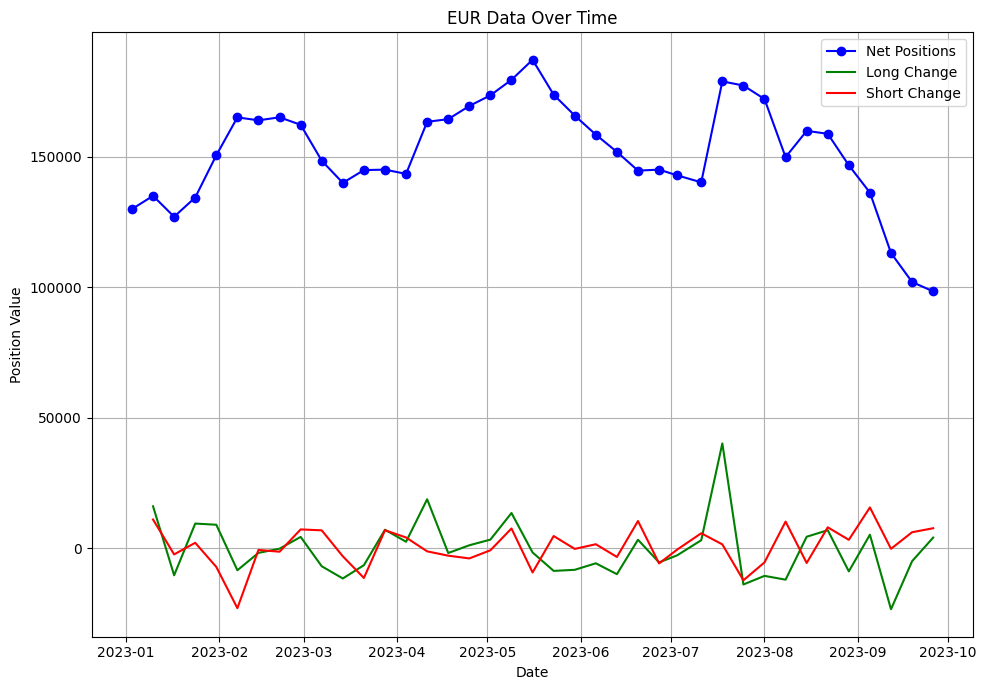

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 'net_positions' su marker
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='net_positions', kind='line', label='Net Positions', color='blue', marker='o', ax=plt.gca())

# 'long_change' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='long_change', kind='line', label='Long Change', color='green', ax=plt.gca())

# 'short_change' column
non_commercial_eur_data.plot(x='report_date_as_yyyy_mm_dd', y='short_change', kind='line', label='Short Change', color='red', ax=plt.gca())

plt.title("EUR Data Over Time")
plt.ylabel("Position Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()


"Susitvarkius duomenų baze ir išsitraukus reikiamus duomenis, matome, jog Net pozicijos yra teigiamos per visą periodą nuo mūsų testavimo pradžios (ziureti tik iki  iki 2023.08). Ši sąvoka nurodo, kad dauguma nekomercinių (t. y., spekuliantų) dalyvių rinkoje laikosi pozicijų, tikėdamiesi, kad tam tikro finansinio instrumento vertė augs. Žinant, kad hedge fondo valdytojai, investiciniai bankai ir kiti dideli investuotojai yra vieni didžiausių rinkos dalyvių, kaip praktika rodo, verta "prisislieti" prie jų. Kitaip tariant, jie yra optimistai dėl rinkos krypties ir tikisi, kad jų ilgosios pozicijos (t. y., pirktos pozicijos) atneš pelno."

In [10]:
filtered_df = df_2023[df_2023['contract_market_name'] == 'JAPANESE YEN']
filtered_df.head()

,id,market_and_exchange_names,report_date_as_yyyy_mm_dd,yyyy_report_week_ww,contract_market_name,cftc_contract_market_code,cftc_market_code,cftc_region_code,cftc_commodity_code,commodity_name,...,conc_gross_le_8_tdr_short_2,conc_net_le_4_tdr_long_other,conc_net_le_4_tdr_short_other,conc_net_le_8_tdr_long_other,conc_net_le_8_tdr_short_other,contract_units,commodity,commodity_subgroup_name,commodity_group_name,futonly_or_combined
227105,230103097741F,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE,2023-01-03T00:00:00.000,2023 Report Week 01,JAPANESE YEN,097741,CME,CHI,097,JAPANESE YEN,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF JPY 12,500,000)",JAPANESE YEN,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227363,230110097741F,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE,2023-01-10T00:00:00.000,2023 Report Week 02,JAPANESE YEN,097741,CME,CHI,097,JAPANESE YEN,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF JPY 12,500,000)",JAPANESE YEN,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227624,230117097741F,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE,2023-01-17T00:00:00.000,2023 Report Week 03,JAPANESE YEN,097741,CME,CHI,097,JAPANESE YEN,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF JPY 12,500,000)",JAPANESE YEN,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
227902,230124097741F,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE,2023-01-24T00:00:00.000,2023 Report Week 04,JAPANESE YEN,097741,CME,CHI,097,JAPANESE YEN,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF JPY 12,500,000)",JAPANESE YEN,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly
228177,230131097741F,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE,2023-01-31T00:00:00.000,2023 Report Week 05,JAPANESE YEN,097741,CME,CHI,097,JAPANESE YEN,...,0.0,0.0,0.0,0.0,0.0,"(CONTRACTS OF JPY 12,500,000)",JAPANESE YEN,CURRENCY,FINANCIAL INSTRUMENTS,FutOnly


In [11]:
jpy_data = filtered_df[filtered_df['contract_market_name'] == "JAPANESE YEN"]
non_commercial_jpy_data = jpy_data[['report_date_as_yyyy_mm_dd',
                                    'contract_market_name', 
                                    'noncomm_positions_long_all',
                                    'noncomm_positions_short_all', 
                               ]]
non_commercial_jpy_data.head()

,report_date_as_yyyy_mm_dd,contract_market_name,noncomm_positions_long_all,noncomm_positions_short_all
227105,2023-01-03T00:00:00.000,JAPANESE YEN,25377,72241
227363,2023-01-10T00:00:00.000,JAPANESE YEN,26395,61772
227624,2023-01-17T00:00:00.000,JAPANESE YEN,29458,52419
227902,2023-01-24T00:00:00.000,JAPANESE YEN,27620,49255
228177,2023-01-31T00:00:00.000,JAPANESE YEN,22550,42610


In [12]:
jpy_data = filtered_df[filtered_df['contract_market_name'] == "JAPANESE YEN"]

non_commercial_jpy_data = jpy_data[['report_date_as_yyyy_mm_dd',
                                   'contract_market_name', 
                                   'noncomm_positions_long_all',
                                   'noncomm_positions_short_all']]

# suskaiciuoju skirtumus tarp long and short poziciju
non_commercial_jpy_data['long_change'] = non_commercial_jpy_data['noncomm_positions_long_all'].astype(int).diff()
non_commercial_jpy_data['short_change'] = non_commercial_jpy_data['noncomm_positions_short_all'].astype(int).diff()

# suskaiciuoju net pozicijas
non_commercial_jpy_data['net_positions'] = non_commercial_jpy_data['noncomm_positions_long_all'].astype(int) - non_commercial_jpy_data['noncomm_positions_short_all'].astype(int)
#convertuoju i datetime formata
non_commercial_jpy_data['report_date_as_yyyy_mm_dd'] = pd.to_datetime(non_commercial_jpy_data['report_date_as_yyyy_mm_dd'])

# palieku tik data be laiko
non_commercial_jpy_data['report_date_as_yyyy_mm_dd'] = non_commercial_jpy_data['report_date_as_yyyy_mm_dd'].dt.date

#print(non_commercial_eur_data['report_date_as_yyyy_mm_dd'])
df_sorted = non_commercial_jpy_data.sort_values(by='report_date_as_yyyy_mm_dd', ascending=False)
# df_sorted.head(50)


In [13]:
df_sorted.rename(columns={
    'report_date_as_yyyy_mm_dd': 'Report Date',
    'contract_market_name': 'Contract Market',
    'noncomm_positions_long_all': 'Non-Commercial Long Positions',
    'noncomm_positions_short_all': 'Non-Commercial Short Positions',
    'long_change': 'Change in Long Positions',
    'short_change': 'Change in Short Positions',
    'net_positions': 'Net Positions'
}, inplace=True)


df_sorted.head(50)

,Report Date,Contract Market,Non-Commercial Long Positions,Non-Commercial Short Positions,Change in Long Positions,Change in Short Positions,Net Positions
237858,2023-09-26,JAPANESE YEN,46169,155681,432.0,8325.0,-109512
237559,2023-09-19,JAPANESE YEN,45737,147356,7490.0,10396.0,-101619
237270,2023-09-12,JAPANESE YEN,38247,136960,1233.0,2810.0,-98713
236982,2023-09-05,JAPANESE YEN,37014,134150,12224.0,10887.0,-97136
236689,2023-08-29,JAPANESE YEN,24790,123263,-3890.0,-740.0,-98473
236391,2023-08-22,JAPANESE YEN,28680,124003,-6109.0,8253.0,-95323
236104,2023-08-15,JAPANESE YEN,34789,115750,11654.0,9435.0,-80961
235816,2023-08-08,JAPANESE YEN,23135,106315,-3714.0,250.0,-83180
235538,2023-08-01,JAPANESE YEN,26849,106065,-3509.0,-2045.0,-79216
235241,2023-07-25,JAPANESE YEN,30358,108110,582.0,-11905.0,-77752


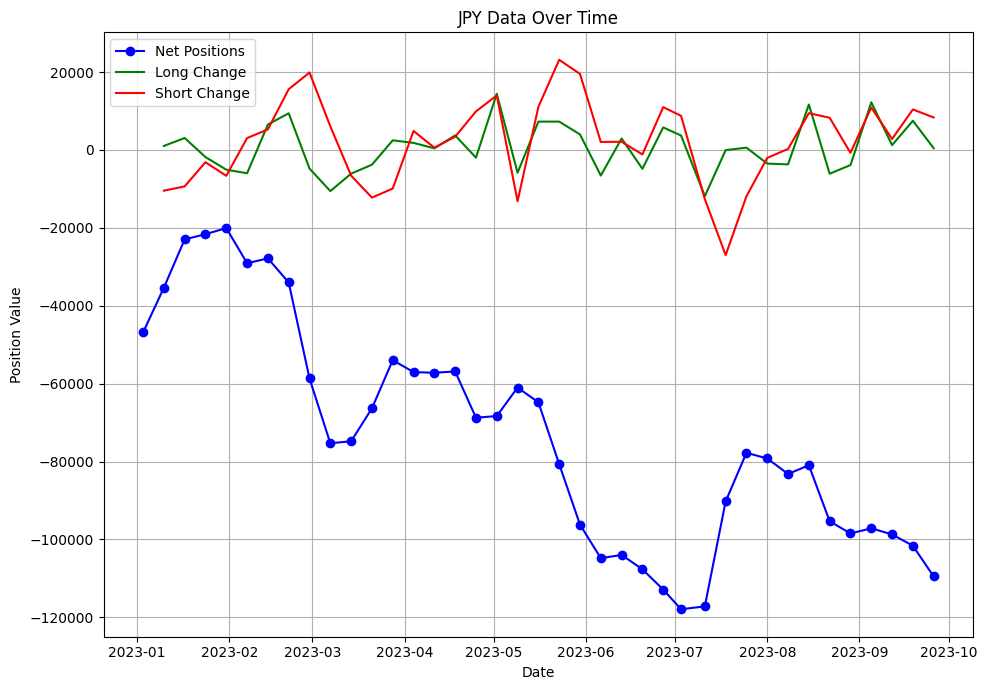

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 'net_positions' su marker
non_commercial_jpy_data.plot(x='report_date_as_yyyy_mm_dd', y='net_positions', kind='line', label='Net Positions', color='blue', marker='o', ax=plt.gca())

# 'long_change' column
non_commercial_jpy_data.plot(x='report_date_as_yyyy_mm_dd', y='long_change', kind='line', label='Long Change', color='green', ax=plt.gca())

# 'short_change' column
non_commercial_jpy_data.plot(x='report_date_as_yyyy_mm_dd', y='short_change', kind='line', label='Short Change', color='red', ax=plt.gca())

plt.title("JPY Data Over Time")
plt.ylabel("Position Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

"Susitvarkius duomenų baze ir išsitraukus reikiamus duomenis, matome, jog Net pozicijos (melyna linija) yra neigiamos per visą periodą nuo mūsų testavimo pradžios (ziureti tik iki  iki 2023.08). Ši sąvoka nurodo, kad dauguma nekomercinių (t. y., spekuliantų) dalyvių rinkoje laikosi pozicijų, tikėdamiesi, kad tam tikro finansinio instrumento vertė kris. Žinant, kad hedge fondo valdytojai, investiciniai bankai ir kiti dideli investuotojai yra vieni didžiausių rinkos dalyvių, kaip praktika rodo, verta "prisislieti" prie jų. Kitaip tariant, jie yra pesimistai dėl rinkos krypties ir tikisi, kad jų turimos pozicijos (t. y., 'shorted' pozicijos) atneš pelno."

**EURJPY** valiutos pora atspindi kiek vieno euro galima gauti už Japonijos jenus. Ši pora yra susijusi su dviem valiutomis: euru (EUR) ir Japonijos jena (JPY).

1. **EUR Non-Commercial Net Positions yra teigiamos**: Tai reiškia, kad spekuliantai ir kitos nekomercinės institucijos (pvz., investiciniai fondai) tikisi, kad euras stiprės prieš kitas valiutas. Kitaip tariant, jie tikisi, kad euro vertė augs.

2. **JPY Non-Commercial Net Positions yra neigiamos**: Tai reiškia, kad tie patys nekomerciniai rinkos dalyviai tikisi, kad Japonijos jena susilpnės prieš kitas valiutas, t. y. jos vertė kris.

Svarstydami šiuos du aspektus kartu, galime daryti prielaidą, kad:

- Jei EUR net pozicijos yra teigiamos ir JPY net pozicijos yra neigiamos, tai  reiškia, kad rinkos dalyviai tikisi, kad euras stiprės prieš Japonijos jeną. Tai, savo ruožtu, turėtų reikšti, kad EURJPY valiutos poros kaina turėtų augti. Kitaip tariant, už vieną eurą bus galima gauti daugiau jenų.

Vis dėlto reikėtų atkreipti dėmesį, kad nors šie pozicijų duomenys gali suteikti tam tikrą perspektyvą, jie nėra garantija dėl būsimų kainų pokyčių. Daugybė kitų veiksnių, tokie kaip makroekonominiai duomenys, politika, palūkanų normos ir kt., taip pat gali turėti įtakos valiutos kurso kryptims.

Kad nepirktume šio produkto "užmerktomis akimis", bandysime pasipelnyti iš trumpalaikių kainų svyravimų, tačiau tik pirkdami. Naudosime strategiją, aprašytą "Strategy-1" faile.